TIDY DATA PROJECT, DATA CLEANING AND VISUALIZATION
Paulina Turner Castelo
17 March 2025
Elements of Computing II

In [1]:
import pandas as pd #Importing pandas library and setting pd as a referral to it
import matplotlib.pyplot as plt  # Importing the necessary library for plotting

In [2]:
df=pd.read_csv("olympics_08_medalists.csv") #setting the csv file as df
df #Will show the first and last rows of the dataset 

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,Éver Banega,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871,Ólafur Stefánsson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872,Óscar Brayson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873,Łukasz Pawłowski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


COMMENTS ON DATA SET PREVIEW

In these first lines of code, we ask the Python notebook to read the csv file, and then display it. Since it has thousands of rows only the first 5 and last 5 are shown. From this first look, I can tell that having sport name as the columns is not the best format since it is hard to read. Additionally, there are a lot of cells with NaN values meaning that that that particular athlete does not have a medal in the sport listed. 

In [24]:
df_melted = df.melt(id_vars=["medalist_name"], var_name="sport_name", value_name="medal") #Melting the dataset
df_melted[['gender', 'sport']] = df_melted['sport_name'].str.split('_', n=1, expand=True)
df_melted.drop(columns=['sport_name'], inplace=True)
df_melted = df_melted.dropna(subset=['medal']) # Drop NaN values
df_melted = df_melted[df_melted['medal'] != "No Medal"] # Remove "No Medal" entries
df_melted

,medalist_name,medal,gender,sport
177,Bair Badënov,bronze,male,archery
676,Ilario Di Buò,silver,male,archery
682,Im Dong-hyun,gold,male,archery
760,Jiang Lin,bronze,male,archery
920,Lee Chang-hwan,gold,male,archery
...,...,...,...,...
130932,Steeve Guénot,gold,male,greco-roman wrestling
131159,Yannick Szczepaniak,bronze,male,greco-roman wrestling
131162,Yavor Yanakiev,bronze,male,greco-roman wrestling
131200,Yury Patrikeyev,bronze,male,greco-roman wrestling


COMMENTS ON MELTING PROCESS TO TIDY DATA (Melting)

As mentioned before, the layout of the information on the data set is not the most readable. Because of that the first line of code in this section was dedicated to rearrange the data table/ data set. It moved the data so that medalist_name was one column, sport_name was another column and medal another column. Switching sport to a column allows the data to be more readable and compact (vertical rather than horizontal). It is easier to scroll down than to scroll to the sides. In the second line of code in this section, we take the sport_name column which gives results in a notation like (gender_sport) and create two new columns based on the original column. That way gender can be its own column, and sport its own column. This is followed by dropping the original gender and sport combined column in the fourth line of code. In the next two lines of code, we drop the rows that have NaN in the medal column since I am not interested in seeing those who have not gotten a medal. Plus, the preview was only showing those NaN medals, this facilites the readablity.  

In [ ]:
df_cleaned = df_melted[['medalist_name', 'gender', 'sport', 'medal']] #reordering the columnns
df_cleaned.rename(columns={"medalist_name": "medalist"}, inplace=True) #changing the name of column to be more user friendly
df_cleaned 

,medalist,gender,sport,medal
177,Bair Badënov,male,male_archery,bronze
676,Ilario Di Buò,male,male_archery,silver
682,Im Dong-hyun,male,male_archery,gold
760,Jiang Lin,male,male_archery,bronze
920,Lee Chang-hwan,male,male_archery,gold
...,...,...,...,...
130932,Steeve Guénot,male,male_greco-roman wrestling,gold
131159,Yannick Szczepaniak,male,male_greco-roman wrestling,bronze
131162,Yavor Yanakiev,male,male_greco-roman wrestling,bronze
131200,Yury Patrikeyev,male,male_greco-roman wrestling,bronze


COMMENTS ON TIDYING DATA (cleaning)

To continue the readability, I changed the order from medalist, medal, gender, and sport to medalist, gender, sport, and medal. This is a personal preference detail, but medalist and gender need to go together in my opinion. Additionally a renamed the medalist_name column to just medalist for easier readability too. 

In [ ]:
pivot_medal_count = df_melted.pivot_table(index="sport", columns="gender", values="medal", aggfunc="count") #Creating a pivot table to count medals by sport and gender
print(pivot_medal_count)

gender                 female  male
sport                              
archery                   9.0  11.0
artistic gymnastics      20.0  29.0
association football     54.0  55.0
athletics                81.0  85.0
badminton                10.0  12.0
baseball                  NaN  72.0
basketball               36.0  35.0
beach volleyball          6.0   6.0
bmx                       3.0   3.0
boxing                    NaN  44.0
canoeing and kayaking    21.0  53.0
diving                   13.0  16.0
equestrian sport         20.0  18.0
fencing                  26.0  28.0
field hockey             48.0  50.0
freestyle wrestling      16.0  28.0
greco-roman wrestling     NaN  27.0
handball                 42.0  43.0
judo                     28.0  28.0
modern pentathlon         2.0   3.0
mountain biking           3.0   3.0
rhythmic gymnastics      21.0   NaN
road bicycle racing       6.0   5.0
rowing                   58.0  83.0
sailing                  21.0  33.0
shooting sport           17.

COMMENTS ON PIVOT TABLE FOR MEDAL COUNT

This pivot table is done to get a look at the amount of medals for each sport, it places the amount by gender too which is great for comparisons. From this information I can tell that there are some sports that some genders do not participate in such as Males in Rythmic Gymnastics. The order of the sports is alphabetical for easier searching. 

In [21]:
df_melted.rename(columns={"medalist_name": "medalist"}, inplace=True)
pivot_medal_gender = df_melted.pivot_table(index="gender", columns="medal", values="medalist", aggfunc="count")
print(pivot_medal_gender)

medal   bronze  gold  silver
gender                      
female     294   271     278
male       374   315     343


COMMENTS ON PIVOT TABLE 2 

This pivot table is much smaller than the last one, as it serves more of a quick preview of medals by medal type and gender. Also, since it doesn't include individual sports it is much smaller. This information can quickly tell me that males had more medals overall (in all medal types). The medal type that is most popular in females is bronze, and this is the same in males. The amount of medalists decreases as the metal prestiege increases. 

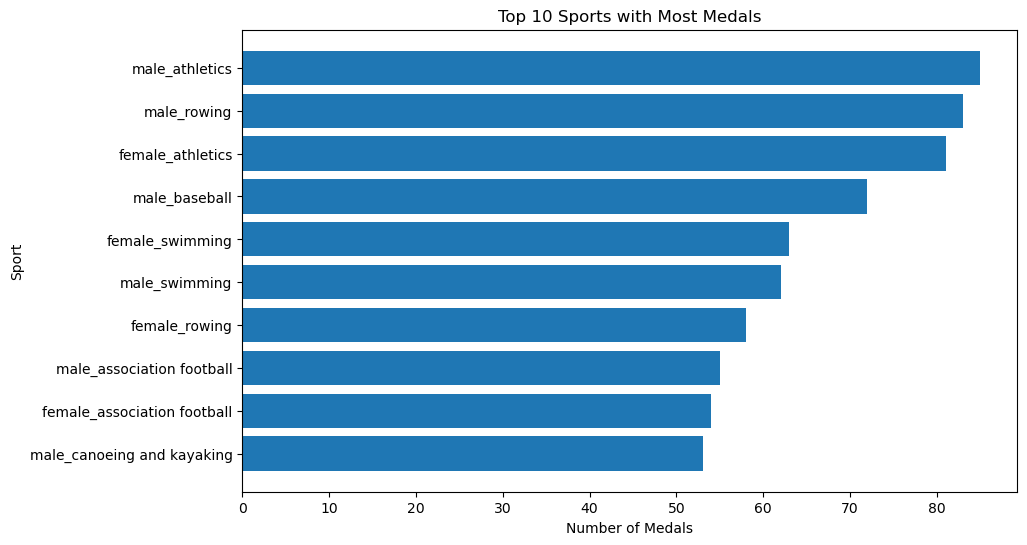

In [ ]:
top_sports = df_cleaned['sport'].value_counts().head(10) #Counting the top ten sports medalists

# Create horizontal bar chart
plt.figure(figsize=(10, 6)) #set size to ten by six
plt.barh(top_sports.index, top_sports.values) #setting the bar chart as horizontal
plt.xlabel("Number of Medals") #define x axis
plt.ylabel("Sport") #define y axis
plt.title("Top 10 Sports with Most Medals") #set title
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show() # display

COMMENTS ON HORIZONTAL BAR CHART FOR TOP 10 SPORTS WITH MEDALS

The intention here was to visualize the sports with most medalists while still having them separated by gender. I wanted to see the top ten sports with most medals to keep the visualization concise. That is why I did the value counts with head-ten. The next lines of code are for basic formatting. It is clear that in 2008, the sport with the most medals is athletics with male and female being in spots 1 and 3. 

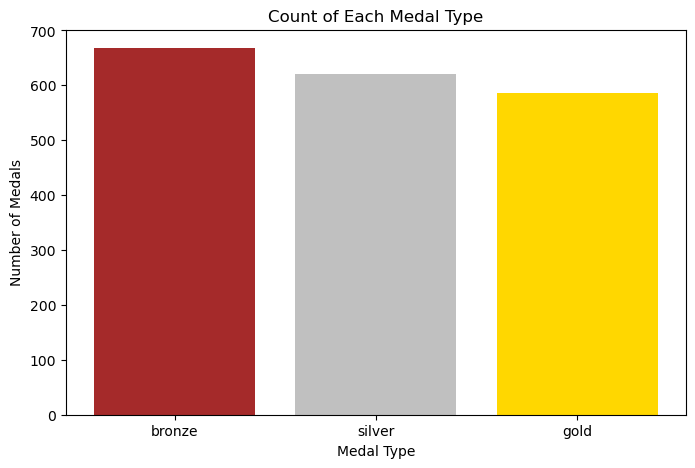

In [25]:
medal_counts = df_melted['medal'].value_counts()

# Create bar chart
plt.figure(figsize=(8, 5)) # set size to eight by five
plt.bar(medal_counts.index, medal_counts.values, color=['brown', 'silver', 'gold'])  # Custom colors for each medal type
plt.xlabel("Medal Type") #set x axis
plt.ylabel("Number of Medals") #set y axis
plt.title("Count of Each Medal Type") #set title
plt.show() #display

COMMENTS ON BAR CHART OF COUNT OF EACH MEDAL TYPE

This visualization demonstrates that there is a decreasing amount of medalists as the recognition increases. To code this it is necessary to do the value counts for medals. Bronze has the highest and Gold has the lowest. I wanted to color code these bars so that it was more clear. 

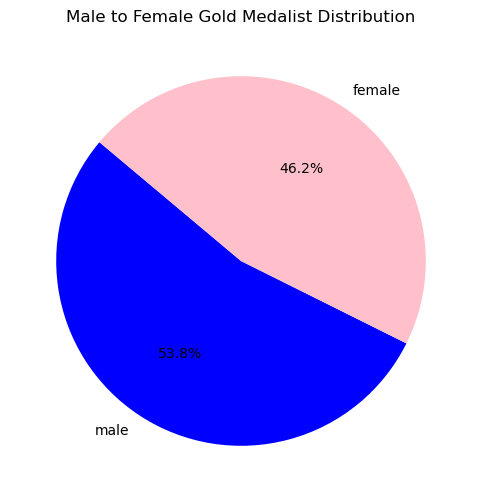

In [16]:
gold_medalists = df_melted[df_melted['medal'] == 'gold'] #filtering for only gold medalists 
gender_gold_counts = gold_medalists['gender'].value_counts() #count the number of gold medalists by gender
plt.figure(figsize=(6, 6)) #set size to 6 by 6
plt.pie(gender_gold_counts, labels=gender_gold_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink']) #set colors to pink for female and blue for males
plt.title("Male to Female Gold Medalist Distribution") #set title
plt.show() #display

COMMENTS ON PIE CHART FOR GOLDE MEDALS BY GENDER 
While I knew from the previous visualizations that males dominate in all medal levels, I wanted to get a better idea of the ratio that describes the medal counts by gender. In this case, I chose to focus on gold medalists. The first two lines of code are dedicated to this, asking the computer to filter out only for gold in the medal column, and then count that by gender. The rest lines of code are for formatting and setting the female area in pie chart to pink and male are of pie to blue since these colors are what typically represent the genders. 

It is important to remember that this information is only for the 2008 year. It raises questions on how the distribution of male to female, or bronze to silver to gold, or medals by sport would change over time. Trends in more females as professional athletes, or popularity on a certain sport growing could influence this. 